# Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

# Defining the problem

A program that will determine whether a fire is likely in certain conditions

Performance measured by classification accuracy — precision/recall tradeoff as well (high as possible for both)

Reducing Dimensionality through Principal Component Analysis (PCA)?

Assumptions: 
- These were caused by external factors that are included as attributes (not lightening, manmade etc)

Motivation:
- To learn about binary classification and the various methods one might perform this
- explore different options for algorithms and data visualization techniques (performance measurements) 

Solution Benefit: 
- better understanding of the overall process of machine learning 
- in depth documentation for binary classification (including decision justification)
- binary classification algorithms -- useful in other problems or when using them for other classifications 

Solution Use: 
- create an API with this model and another forest fire model I will train in the future to determine the likelihood of forest fires in my own state

# Importing Data

In [23]:
import pandas as pd
data_Bejaia = pd.read_csv(r"/Users/aditijain/Desktop/UW/activities/python:ML/projects/forest-fires/classification/Algerian_forest_fires_dataset_UPDATE.csv", skiprows = 1, nrows=122)
data_Bejaia

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,extra,Class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,not fire


In [24]:
data_Abbes = pd.read_csv(r"/Users/aditijain/Desktop/UW/activities/python:ML/projects/forest-fires/classification/Algerian_forest_fires_dataset_UPDATE.csv", skiprows = 126, nrows=122)
data_Abbes

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,extra,Class
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,fire
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,not fire
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,not fire
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,not fire


In [25]:
data = data_Bejaia.append(data_Abbes) # makes a copy
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,extra,Class
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,fire
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,not fire
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,not fire
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,not fire


# Data Preparation

Data Aggregation (combining features to make more useful)

In [26]:
day = data.day
month = data.month
Date = month + (day/100)
data['Date'] = Date
data = data.drop(columns=['day','month','year','extra'])
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class,Date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,6.01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,6.02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,6.03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,6.04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,6.05
...,...,...,...,...,...,...,...,...,...,...,...,...
117,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,9.26
118,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,9.27
119,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,9.28
120,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,9.29


Creates integers for the Class labels (instead of fire and not fire)

In [27]:
df_one = pd.get_dummies(data["Class"])
df_one = df_one.drop(columns=['not fire'], axis=1)

In [28]:
data['fire']= df_one
data = data.drop(columns=['Class'],axis=1)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Date,fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,6.01,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,6.02,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,6.03,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,6.04,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,6.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
117,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,9.26,1
118,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,9.27,0
119,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,9.28,0
120,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,9.29,0


Split data into train and test sets

In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['fire'],axis=1)
y = data.fire

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

Outlier detection: extreme value analysis with scatter plots, Guassian distribution, histograms, box and whisker plots => if more than 2 or three stds away
    
Filter out outliers candidate from training dataset and assess your models performance

In [30]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Date'],
      dtype='object')

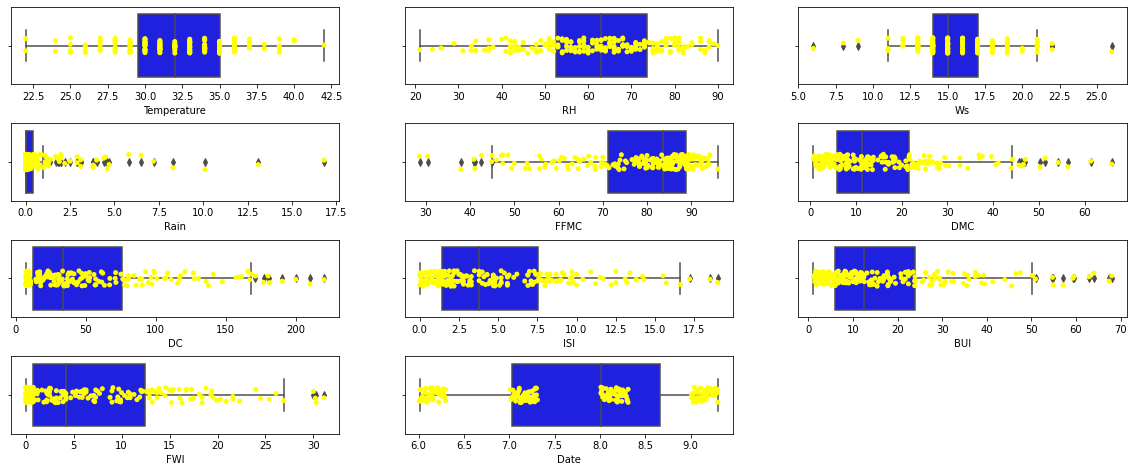

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

i = 1
for feature in X_train.columns:
    ax = fig.add_subplot(5, 3, i)
    sns.boxplot(x=feature, data=X_train, color='blue')
    sns.stripplot(x=feature, data=X_train, color='yellow')
    plt.subplots_adjust(hspace = .5)
    i+=1

#### Results

- When looking at the scatter plots below, it seems like the most important/dependent features are the FFMC, FWI, ISI, BUI, DMC, DC
- Rain surprisingly doesn't have a big correlation with fire likelihood and nor does temperature and wind speed (Ws) 
- Relative Humidity kind of has an effect but it is not as noticeable from this graph

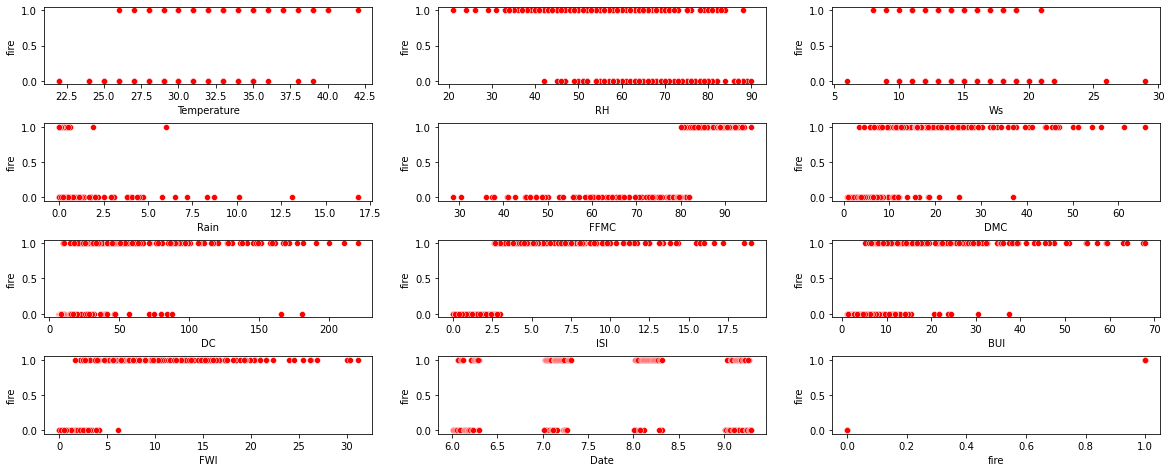

In [32]:
fig = plt.figure(figsize=(20,10))
i = 1
for feature in data.columns:
    ax = fig.add_subplot(5, 3, i)
    sns.scatterplot(x=feature, y='fire', data=data, color='red')
    plt.subplots_adjust(hspace = .5)
    i+=1

In [33]:
X_train.mean(axis=0)

Temperature    32.025641
RH             62.200000
Ws             15.656410
Rain            0.778462
FFMC           77.978462
DMC            15.282564
DC             51.253333
ISI             4.882564
BUI            17.347179
FWI             7.285641
Date            7.675949
dtype: float64

Quantile Plots => plotting feature vs Z-scores based on probability distribution. This can help us find a relationship to transform a feature to linearize it

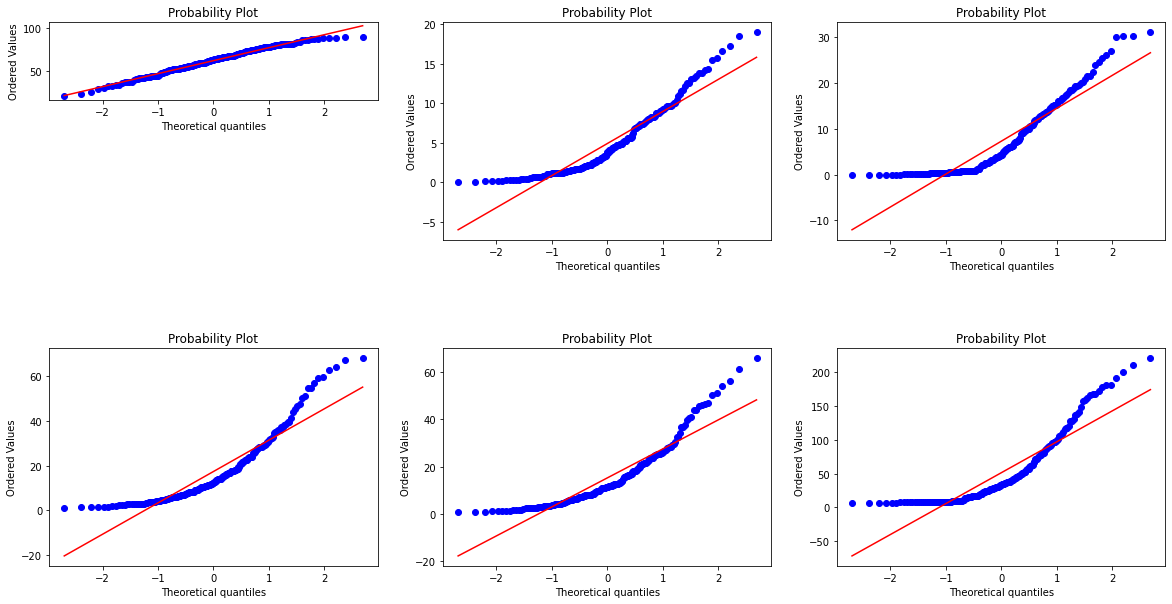

In [34]:
from scipy import stats
fig = plt.figure(figsize=(20,10))

fig.add_subplot(5, 3, 1)
stats.probplot(x=X_train.RH,plot=plt, fit=True)
plt.subplots_adjust(hspace = .5)

fig.add_subplot(2, 3, 2)
stats.probplot(x=X_train.ISI,plot=plt, fit=True)
plt.subplots_adjust(hspace = .5)

fig.add_subplot(2, 3, 3)
stats.probplot(x=X_train.FWI,plot=plt, fit=True)
plt.subplots_adjust(hspace = .5)

fig.add_subplot(2, 3, 4)
stats.probplot(x=X_train.BUI,plot=plt, fit=True)
plt.subplots_adjust(hspace = .5)

fig.add_subplot(2, 3, 5)
stats.probplot(x=X_train.DMC,plot=plt, fit=True)
plt.subplots_adjust(hspace = .5)

fig.add_subplot(2, 3, 6)
stats.probplot(x=X_train.DC,plot=plt, fit=True)
plt.subplots_adjust(hspace = .5)


### Data Scaling (Training Data)

(data attributes have the same scale from -1 to 1): dependent on the model that we try, but it shouldn't make a difference in the models that scaling is not necessary in

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

- Classification Accuracy: number of correct predictions / total predictions => when the data is evenly split, it works well but when the data isn't evenly split => it isn't a measure of the model's accuracy because the accuracy could be high with the same predictions each time
- Logarithmic Loss: works well for multiclass classification (prediction has more than 2 options)
- Confusion Matrix
- Area under Curve (AUC): probability of ranking a randomly chosen positive example higher than a randomly chosen negative example - a greater number is an indicator of a better performing model (range = [0,1])
- F1 Score: harmonic mean between precision and recall- higher number = better performance
- Mean Absolute Error: difference between the Original Values and the Predicted Values
- Mean Squared Error: average of the square of the difference between the original values and the predicted values

X_train is pretty evenly split between fire and not fire so we could try classification accuracy or just stick with AUC or F1 score

In [36]:
y_train[y_train==0] 

120    0
30     0
115    0
68     0
104    0
      ..
66     0
106    0
14     0
92     0
102    0
Name: fire, Length: 84, dtype: uint8

## Spot Checking Algorithms

Define the models in a dictionary => list classification models and add them into dictionary with shortforms of the models as the keys

Linear: 
- Logistic Regression
- Ridge Regression
- Stochastic Gradient Descent Classifier
- Passive Aggressive Classifier

Nonlinear: 
- k-Nearest Neighbors
- Classification and Regression Trees
- Extra Tree
- Support Vector Machine
- Naive Bayes

Ensemble: 
- AdaBoost
- Bagged Decision Trees
- Random Forest
- Extra Trees
- Gradient Boosting Machine

obtained from https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/

trying everything with default settings first

In [116]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier 
from statistics import mean, stdev

def define_models(models=dict()):
    models['logreg'] = LogisticRegression()
    
    alpha = [0.2, 0.4, 0.6, 0.8, 1.0]
    for a in alpha:
        models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
    models['SGD'] = SGDClassifier(max_iter=1000, tol=1e-3)
    models['PA'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
    
    n_neighbors = range(1, 10)
    for k in n_neighbors:
        models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
    models['dtree'] = DecisionTreeClassifier()
    models['svc'] = SVC() # kernel = rbf
    models['naive'] = GaussianNB()

    n_trees = 100
    models['ada'] = AdaBoostClassifier()
    models['bag'] = BaggingClassifier(n_estimators=n_trees)
    models['rf'] = RandomForestClassifier(n_estimators=n_trees)
    models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
    models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
    print('Defined %d models' % len(models))
    return models

In [117]:
from sklearn.pipeline import Pipeline
def make_pipeline(model):
    steps = list()
    steps.append(("standardize", StandardScaler()))
    steps.append(("model", model))
    pipeline = Pipeline(steps=steps)
    return pipeline

In [118]:
from sklearn.model_selection import cross_val_score
def evaluate_model(X, y, model, folds, metric):
    pipeline = make_pipeline(model)
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores

In [127]:
def evaluate_models(X, y, models, folds=10, metric='roc_auc'):
    results = dict()
    for name, model in models.items():
        scores = evaluate_model(X, y, model, folds, metric)
        if scores is not None:
            results[name] = scores
            mean_score, std_score = mean(scores), stdev(scores)
            print('=> %s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
        else:
            print('%s: error' % name)
    return results

In [128]:
import matplotlib.pyplot as plt
def summarize_results(results, maximize=True, top_n=10):
    if len(results) == 0:
        print('no results')
        return
    n = len(results)
    mean_scores = [(name, mean(score)) for name,score in results.items()]
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    if maximize:
        mean_scores = list(reversed(mean_scores))
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), stdev(results[name])
        print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
    plt.boxplot(scores, labels=names)
    _, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()

Defined 25 models
=> logreg: 0.996 (+/-0.006)
=> ridge-0.2: 0.985 (+/-0.018)
=> ridge-0.4: 0.985 (+/-0.018)
=> ridge-0.6: 0.985 (+/-0.018)
=> ridge-0.8: 0.985 (+/-0.018)
=> ridge-1.0: 0.985 (+/-0.018)
=> SGD: 0.998 (+/-0.005)
=> PA: 0.998 (+/-0.005)
=> knn-1: 0.896 (+/-0.036)
=> knn-2: 0.949 (+/-0.049)
=> knn-3: 0.969 (+/-0.031)
=> knn-4: 0.966 (+/-0.028)
=> knn-5: 0.973 (+/-0.025)
=> knn-6: 0.972 (+/-0.024)
=> knn-7: 0.969 (+/-0.029)
=> knn-8: 0.973 (+/-0.021)
=> knn-9: 0.973 (+/-0.021)
=> dtree: 0.961 (+/-0.021)
=> svc: 0.991 (+/-0.010)
=> naive: 0.978 (+/-0.030)
=> ada: 0.993 (+/-0.014)
=> bag: 0.998 (+/-0.003)
=> rf: 0.999 (+/-0.003)
=> et: 0.998 (+/-0.005)
=> gbm: 0.990 (+/-0.019)

Rank=1, Name=rf, Score=0.999 (+/- 0.003)
Rank=2, Name=bag, Score=0.998 (+/- 0.003)
Rank=3, Name=et, Score=0.998 (+/- 0.005)
Rank=4, Name=PA, Score=0.998 (+/- 0.005)
Rank=5, Name=SGD, Score=0.998 (+/- 0.005)
Rank=6, Name=logreg, Score=0.996 (+/- 0.006)
Rank=7, Name=ada, Score=0.993 (+/- 0.014)
Rank=8, Na

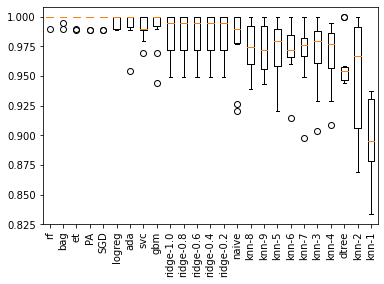

In [129]:
models = define_models()
results=evaluate_models(X_train, y_train, models)
summarize_results(results)

## Improving the RandomForestClassifier model

In [146]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(max_depth=None)
params = {
    'n_estimators': randint(low=100, high=500),
    'min_samples_split': randint(1, 11),
    'min_samples_leaf': randint(1, 11),
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}
random_search = RandomizedSearchCV(rf_model, param_distributions=params,n_iter=10, cv=10, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)

/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packag

/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packag

/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packag

/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packag

/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aditijain/opt/miniconda3/lib/python3.9/site-packag

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa825402250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa8259cfbe0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa8259cfca0>},
                   random_state=42, scoring='roc_auc')

In [150]:
random_search.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       min_samples_leaf=8, min_samples_split=3,
                       n_estimators=249)

In [154]:
def display_scores(scores):
    print("Scores: ", scores) # the array of scores for all 10 cross validation folds
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

Standardization made effectivitly no impact on the scores so ignored for the final model (especially since using a forest classifier which doesn't get affected by distance betwee two numbers anyway)

In [177]:
random_forest = RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       min_samples_leaf=8, min_samples_split=3,
                       n_estimators=249)
random_forest.fit(X_train, y_train)
forest_scores = cross_val_score(random_forest, X_train, y_train, scoring='f1', cv=10)
display_scores(forest_scores)

Scores:  [0.95652174 0.95652174 0.95238095 1.         1.         1.
 1.         1.         1.         0.95238095]
Mean:  0.9817805383022774
Standard Deviation:  0.022352579008307717


### Applying the model to the test data set

In [172]:
from sklearn.metrics import roc_auc_score,f1_score
y_predict = random_forest.predict(X_test)
auc = roc_auc_score(y_test, y_predict, average='samples')
auc

1.0

In [173]:
f1 = f1_score(y_test, y_predict)
f1

1.0

y_test and y_predict match perfectly! I didn't apply the test data until the end and I didn't fit it to the test data, so it cant be overfitting it right?

In [183]:
y_test

24     1
6      1
31     1
89     1
76     1
54     0
70     1
2      0
9      0
101    0
45     0
111    0
117    0
55     0
82     1
24     1
78     1
15     0
66     1
20     1
33     0
19     0
109    1
30     0
64     1
120    0
10     1
73     1
37     1
34     1
112    1
96     0
25     1
60     1
18     0
119    0
97     0
75     1
17     0
119    0
75     1
5      1
113    0
16     0
74     1
67     1
46     1
38     0
73     1
Name: fire, dtype: uint8

In [184]:
y_predict

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1], dtype=uint8)